In [39]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=4)

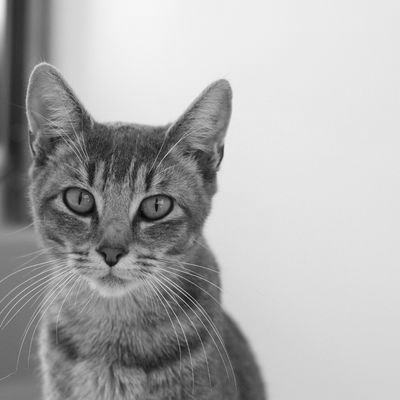

In [3]:
# g === area (big image)
# f === fragment
g = Image.open('img/catcare.jpg').convert('L')
g

In [92]:
g.size
g_mat = np.asarray(g.getdata(), dtype=np.int8).reshape(g.size[1], g.size[0])

(70, 70)


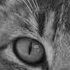

In [5]:
# Crop fragment from area image
xf = 50
yf = 150
wf = 70
hf = 70

crop_box = (xf, yf, xf + wf, yf + hf)
f = g.crop(crop_box)
print f.size
f

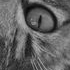

In [6]:
# Create matrix of fragment
f_mat = np.asarray(f.getdata(), dtype=np.int8).reshape(f.size[1], f.size[0])
# Flip matrix
f_mat = np.fliplr(f_mat)
f_mat = np.flipud(f_mat)

Image.fromarray(f_mat, 'L')

In [7]:
num_shades = 256
# Create indicators of f
# of size == g.size
chi = np.zeros((num_shades, g.size[1], g.size[0]), dtype=bool)

In [8]:
# fill the indicators
for h in xrange(f.size[1]):
    for w in xrange(f.size[0]):
        color = f_mat[h, w]
        chi[color, h, w] = True

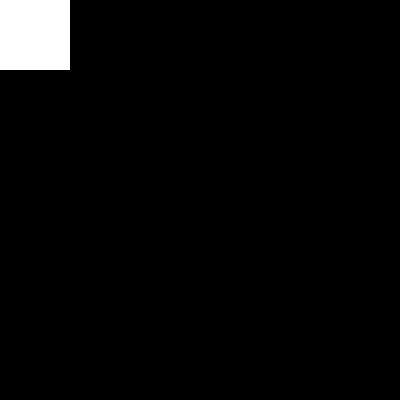

In [168]:
Image.fromarray(chi.sum(axis=0).astype('uint8')*255, 'L')

In [9]:
# chi_elems[i] === number of pixels that have color "i"
chi_elems = np.array( f.histogram() )
print chi_elems

[ 0  0  0  0  0  0  1  0  0  1  0  2  1  2  5  3  6  8  7  7  5 13  8  8  9
  9 14  6 14 16 12  8 13 10 17 10 15 22 16 17 30 23 24 26 22 23 19  7 30 22
 18 31 26 21 33 36 30 27 37 43 32 28 35 28 42 24 42 43 37 40 39 46 32 29 42
 48 38 28 49 32 26 43 39 35 36 38 43 36 33 37 37 36 43 44 41 36 33 52 32 49
 62 40 44 68 38 51 44 46 50 44 55 53 54 62 65 51 67 52 53 65 62 65 50 62 45
 58 51 72 63 57 49 48 50 47 42 41 46 42 34 45 27 39 21 32 30 27 23 23 24 15
 18 17 16 16 10 17 14 13  9  3  9  8  6  8 11  6  6  1  8  4  3  8  3  2  2
  6  1  1  2  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


In [10]:
fft_chi = np.fft.fft2(chi)

In [11]:
fft_g = np.fft.fft2(g_mat)

In [169]:
# Scalar product (g_frag, chi[i])
sp_g_frag_chi = np.zeros((num_shades, g.size[1] - hf, g.size[0] - wf))

for i in xrange(num_shades):
    if chi_elems[i] > 0:
        sp_g_frag_chi[i] = np.fft.ifft2(fft_g * fft_chi[i])[hf:, wf:]

/home/stan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


In [170]:
sp_g_frag_chi[128].shape

(330, 330)

In [171]:
# || Projection of g_frag on f ||^2
norm_pr_gfrag_sqr = np.zeros((g.size[1] - hf, g.size[0] - wf))
for i in xrange(num_shades):
    if chi_elems[i] > 0:
        norm_pr_gfrag_sqr += sp_g_frag_chi[i] ** 2 / float(chi_elems[i])
        

# norm_pr_gfrag_sqr = abs(norm_pr_gfrag_sqr)

In [194]:
# chi_X -- const field of vision
# 1 1 1 0 0 ... 0
# 1 1 1 0 0 ... 0
# 1 1 1 0 0 ... 0
# 0 0 0 0 0 ... 0
# . . .
# 0 0 0 0 0 ... 0
chi_X = np.zeros((g.size[1], g.size[0]), dtype=bool)
chi_X[:hf, :wf] = np.ones((hf, wf))

# || g ||^2
fft_gsqr = np.fft.fft2(g_mat ** 2)
fft_chi_X = np.fft.fft2(chi_X)
norm_gfrag_sqr = np.fft.ifft2(fft_gsqr * fft_chi_X)[hf:, wf:].astype('float')

norm_gfrag_sqr = abs(norm_gfrag_sqr)

/home/stan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part


In [173]:
norm_gfrag_sqr.shape

(330, 330)

In [174]:
# E_gfrag = np.fft.ifft2(fft_g * fft_chi_X)[hf:, wf:].astype('float')
norm_E_gfrag_sqr = np.fft.ifft2(fft_g * fft_chi_X)[hf:, wf:].astype('float') \
                        ** 2 / (wf * hf)

# norm_E_gfrag_sqr = abs(norm_E_gfrag_sqr)

/home/stan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [175]:
norm_E_gfrag_sqr

array([[  1538875.6931,   1494785.6916,   1448446.6359, ...,
          2780032.2033,   2792288.7431,   2804572.2416],
       [  1466763.21  ,   1419468.0002,   1369802.7202, ...,
          2785656.3722,   2797973.0816,   2810316.96  ],
       [  1419876.5145,   1369401.4745,   1316166.1733, ...,
          2791954.5502,   2804237.3145,   2816547.0376],
       ..., 
       [ 12662922.25  ,  12003750.1276,  11219150.25  , ...,
          8994343.7461,   8985348.8247,   8975673.6033],
       [ 12423308.6794,  11770192.5951,  10969911.7788, ...,
          9040674.4237,   9031484.6304,   9021612.96  ],
       [ 12293338.2631,  11643693.7959,  10847895.0631, ...,
          9087124.1216,   9077738.5765,   9067669.5804]])

In [209]:
tau = abs(norm_gfrag_sqr**2 - norm_pr_gfrag_sqr)  / \
        abs(norm_pr_gfrag_sqr - norm_E_gfrag_sqr)
print (norm_gfrag_sqr**2 - norm_pr_gfrag_sqr) 
print (norm_pr_gfrag_sqr - norm_E_gfrag_sqr)

[[  7.1727e+08   9.6545e+08   9.2774e+08 ...,   2.6940e+10   2.6363e+10
    2.5792e+10]
 [  7.2502e+08   9.6939e+08   9.4085e+08 ...,   2.7622e+10   2.6975e+10
    2.6336e+10]
 [  6.8466e+08   9.1854e+08   8.9572e+08 ...,   2.8189e+10   2.7439e+10
    2.6699e+10]
 ..., 
 [  1.4310e+08   1.3805e+08   1.2548e+08 ...,   7.3805e+09   7.5272e+09
    7.4318e+09]
 [  1.7358e+08   1.6809e+08   1.5316e+08 ...,   7.2606e+09   7.3937e+09
    7.2869e+09]
 [  1.6607e+08   1.6417e+08   1.4969e+08 ...,   7.1416e+09   7.2614e+09
    7.1434e+09]]
[[  2.1177e+06   2.1933e+06   2.4026e+06 ...,   5.2365e+02   5.4887e+02
    5.5650e+02]
 [  2.1346e+06   2.1981e+06   2.3013e+06 ...,   5.1381e+02   5.3709e+02
    5.4900e+02]
 [  1.9832e+06   2.1227e+06   2.3040e+06 ...,   5.2963e+02   5.5446e+02
    5.5908e+02]
 ..., 
 [  3.8807e+06   3.5799e+06   3.8392e+06 ...,   2.5460e+03   2.5491e+03
    2.5347e+03]
 [  3.6965e+06   3.6921e+06   3.8275e+06 ...,   2.5652e+03   2.5612e+03
    2.5276e+03]
 [  3.6981e+06   

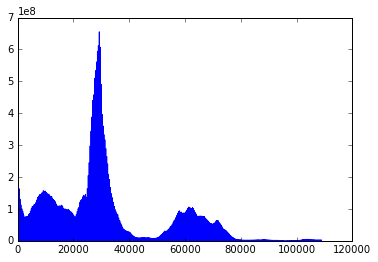

In [210]:
plt.plot(tau.ravel())

In [211]:
tau.shape

(330, 330)

In [212]:
index = tau.argmin() 
x_min = index % tau.shape[1]
y_min = index // tau.shape[1]
print tau.min()
print "x_min, y_min: %d %d" % (x_min, y_min)
tau[145:155, 45:55]

0.000173420245869
x_min, y_min: 21 225


array([[  83.5699,   56.9206,   59.8384,   51.8535,   37.2037,   42.673 ,
          55.0459,   72.6161,   81.2961,   74.0453],
       [  75.196 ,   43.5247,   43.1697,   33.0325,   23.5948,   26.9156,
          31.2649,   44.9828,   58.9724,   58.3763],
       [  65.1291,   39.9691,   33.5402,   20.7299,   17.1074,   19.5403,
          21.2714,   33.0967,   41.172 ,   45.5651],
       [  58.4845,   31.9599,   25.1644,   11.0334,    6.8589,   12.2143,
          17.2453,   23.4951,   26.8846,   30.1573],
       [  62.1234,   34.6744,   29.5319,   10.1496,    1.7232,    7.7185,
          15.5179,   22.6564,   24.4594,   25.1175],
       [  77.017 ,   46.9521,   40.5115,   18.3828,    7.8464,    9.9756,
          15.6894,   22.0229,   29.4795,   35.9475],
       [ 104.8846,   56.8446,   48.2987,   28.8617,   19.7587,   16.2396,
          19.4264,   27.3976,   33.3265,   35.4666],
       [  94.6187,   67.2339,   54.0199,   32.9575,   22.8074,   20.4295,
          17.8702,   23.3613,   29.03

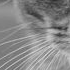

In [213]:
Image.fromarray(g_mat[y_min : y_min + hf , x_min : x_min + wf], 'L')

In [131]:
tmp_a = np.ones((3,5))
tmp_a[2, 1] = 8

In [78]:
print tmp_a
tmp_idx = np.argmax(tmp_a)
print tmp_idx // tmp_a.shape[1],  tmp_idx % tmp_a.shape[1]

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  8.  1.  1.  1.]]
2 1
